In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Total population, N.
N = 1000

#The other model with 8 diffrential equations
ro2,ga,gi,di,dp,dr=0.0001, 0.94, 0.27, 3.5, 1.0, 0.5
beta,l,betal,k,ro1,dh=2.55, 1.56, 7.65, 0.25, 0.580, 0.3
ro3,ro4=0.2,0.3

# A grid of time points (in days)
t = np.linspace(0, 20, 20)

In [3]:
def sist(y,t,beta,l,betal,k,ro1,ga,gi,di,dp,ro2,dr,dh):
    S,E,I,P,H,A,R,F = y
    dSdt = -(S/N)*(beta*(I+l*H)+betal*P)
    dEdt = (S/N)*(beta*(I+l*H)+betal*P)-k*E
    dIdt = k*(ro1*E+ro3*A)-(ga+gi+di)*I
    dPdt = k*(ro2*E+ro4*A)-(ga+gi+dp)*P
    dHdt = ga*(I+P)-(dr+dh)*H
    dAdt = k*(1-ro1-ro2)*E-k*(ro1+ro2)*A
    dRdt = di*(I+P)+dr*H
    dFdt = di*I +dp*P + dh*H
    return dSdt,dEdt,dIdt,dPdt,dHdt,dAdt,dRdt,dFdt

In [4]:
#Constantes
E0=0
P0=5
H0=0
A0=1000
F0=0
R0=0
I0=1
S0=N-6

# Initial conditions vector
y0 = S0, E0, I0, P0, H0, A0, R0, F0 #(System of 8 equations)

#Integrate the sistem with 8 differential equations
ret = odeint(sist, y0, t, args=(beta,l,betal,k,ro1,dh,ro2,ga,gi,di,dp,dr))
S, E, I, P, H, A, R, F = ret.T

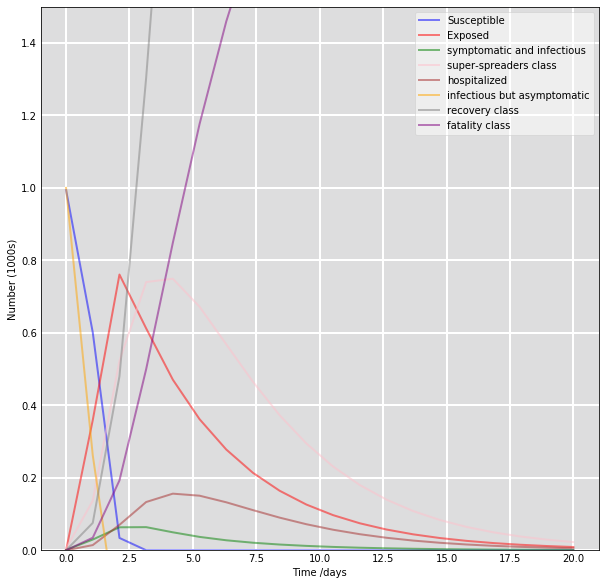

In [7]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
fig.set_size_inches(10,10)

ax = fig.add_subplot(111, facecolor='#ddddde', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')

ax.plot(t, E/1000, 'r', alpha=0.5, lw=2, label='Exposed')

ax.plot(t, I/1000, 'g', alpha=0.5, lw=2, label='symptomatic and infectious')

ax.plot(t, P/1000, 'pink', alpha=0.5, lw=2, label='super-spreaders class ')

ax.plot(t, H/1000, 'brown', alpha=0.5, lw=2, label='hospitalized')

ax.plot(t, A/1000, 'orange', alpha=0.5, lw=2, label='infectious but asymptomatic')

ax.plot(t, R/1000, 'gray', alpha=0.5, lw=2, label='recovery class')

ax.plot(t, F/1000, 'purple', alpha=0.5, lw=2, label='fatality class')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)
plt.show()